## OutOfStock dataset
### A merge of order_detail, order and store v7

In [1]:
# setup for training AND prediction
import analitico
import analitico.plugin
import s24.plugin

from analitico.pandas import *

import pandas as pd
import numpy as np

# pass api token to create factory
factory = analitico.authorize("tok_demo2_xaffg23443d1")

def sample(df):
    return df.sample(n=4)

import datetime
print(datetime.datetime.now())

2019-04-24 17:13:16.189110


In [2]:
# import processed source order_detail
df_odt = factory.run_plugin(settings = {
    "name": "analitico.plugin.DatasetSourcePlugin",
    "dataset_id": "ds_s24_order_detail"
})   

In [3]:
sample(df_odt)

,id,order_id,replaceable,status,quantity,quantity_found,name,type,selling_type,description,...,sel_thickness,ean,ref_id,gdo_id,category_id,category_name,amount,touched_at,created_at,updated_at
3179979,18408376,936482,3,PURCHASED,1.0,1.0,Realforno Frollini Fior di Cacao e Nocciole,3,1,confezione 0.700kg,...,nan,920034214,79143211,0006144,406.0,Biscotti frollini,1.65,2019-01-08 12:06:46,2019-01-07 02:54:31,2019-01-08 13:01:01
4670225,21388868,1064076,1,PURCHASED,1.0,1.0,Amo Essere senza Lattosio - Pascoli Italiani L...,4,1,confezione 1l,...,nan,8017596073938,60825642,0011683001,6226.0,Senza Lattosio,0.99,2019-03-05 13:27:58,2019-03-05 09:06:37,2019-03-05 14:01:12
5602101,23253158,1141724,3,PURCHASED,1.0,1.0,Gemma di Mare Iodato Sale Marino Grosso,3,1,Confezione 1000g,...,nan,8002280003155,70860283,5140460,6009.0,Sale Grosso,0.71,2019-04-09 10:21:42,2019-04-08 19:56:33,2019-04-09 10:47:30
1278505,14602733,770507,1,PURCHASED,1.0,1.0,Dash Polvere Regolare 22+3 Misurini,3,1,confezione 1625g,...,nan,4084500902671,69408849,715726200,1803.0,In polvere,6.55,2018-10-05 08:43:52,2018-10-04 16:07:45,2018-10-05 09:29:04


In [4]:
df_odt = factory.run_plugin(df_odt, settings = {
    "name": "analitico.plugin.TransformDataframePlugin",
    "schema": {
        "columns": [
            { "name": "id", "rename": "odt_id" },
            { "name": "ean", "rename": "odt_ean" },
            { "name": "name", "rename": "odt_name" },
            { "name": "category_id", "rename": "odt_category_id" },
            { "name": "replaceable", "rename": "odt_replaceable" },
            { "name": "variable_weight", "rename": "odt_variable_weight" },
            { "name": "price", "rename": "odt_price" },
            { "name": "price_per_type", "rename": "odt_price_per_type", "type": "float" },
            { "name": "surcharge_fixed", "rename": "odt_surcharge_fixed" },
            { "name": "touched_at", "rename": "odt_touched_at" },
            { "name": "status", "rename": "odt_status" },
            { "name": "order_id", "rename": "ord_id" }
        ]
    }
})

In [5]:
# .0 is added erroneously to the data
df_odt["odt_ean"] = df_odt["odt_ean"].str.rstrip(".0")
df_odt["odt_category_id"] = df_odt["odt_category_id"].str.rstrip(".0")


sample(df_odt)

,odt_id,odt_ean,odt_name,odt_category_id,odt_replaceable,odt_variable_weight,odt_price,odt_price_per_type,odt_surcharge_fixed,odt_touched_at,odt_status,ord_id
4005805,20060028,203103,Cotolette di Maiale Allevato in Italia,208,2,1,2.30,7.30,0.00,2019-02-07 11:27:34,PURCHASED,1007636
3382905,18814228,8003170033764,Conad Carta Igienica Maxi Rotoli 2 Veli,31,2,0,1.98,1.00,0.00,2019-01-15 12:12:19,PURCHASED,953964
1013217,14072035,800351002311,Intesa Pour Homme Deodorant Essence Power 150 Ml,114,3,0,2.90,19.00,-0.91,2018-09-20 10:06:14,PURCHASED,745751
4638770,21325958,2130233,Finocchio,261,3,1,1.17,2.79,-1.20,2019-03-04 10:08:55,PURCHASED,1061462


## Import Store

In [6]:
# import store_id field from order table
df_sto_id = factory.run_plugin(settings = {
    "name": "analitico.plugin.DatasetSourcePlugin",
    "dataset_id": "ds_s24_order"
})  

df_sto_id = factory.run_plugin(df_sto_id, settings = {
        "name": "analitico.plugin.TransformDataframePlugin",
        "schema": {
        "columns": [
            { "name": "id", "rename": "ord_id" },
            { "name": "store_id", "rename": "sto_id" }
        ]
    }
})  

sample(df_sto_id)

,ord_id,sto_id
426504,874019,855965
12287,44618,24620
38203,96488,76524
342949,706815,688055


In [7]:
# import store_id field from order table
df_store = factory.run_plugin(settings = {
    "name": "analitico.plugin.DatasetSourcePlugin",
    "dataset_id": "ds_s24_store"
})  

In [8]:
df_store = factory.run_plugin(df_store, settings = {
        "name": "analitico.plugin.TransformDataframePlugin",
        "schema": {
        "columns": [
            { "name": "id", "rename": "sto_id" },
            { "name": "name", "rename": "sto_name", "type": "category" },
            { "name": "area", "rename": "sto_area", "type": "category" },
            { "name": "province", "rename": "sto_province", "type": "category" },
            { "name": "ref_id", "rename": "sto_ref_id", "type": "category" }
        ]
    }
}) 

In [9]:
sample(df_store)

,sto_id,sto_name,sto_area,sto_province,sto_ref_id
553982,1111902,Panorama,TO5,TO,1339
324625,651175,simply,CT1,CT,5077
8354,16744,conad city,nan,RM,2923
243195,486815,eurospin,RM15,RM,5053


In [10]:
df_merge = df_odt.merge(df_sto_id, how="inner", on="ord_id")
df_merge = df_merge.merge(df_store, how="inner", on="sto_id")

print("df_odt rows: {}\ndf_sto_id rows: {}\ndf_m1 rows: {}".format(len(df_odt), len(df_sto_id), len(df_merge)))
sample(df_merge)

df_odt rows: 5955914
df_sto_id rows: 570036
df_m1 rows: 5835511


,odt_id,odt_ean,odt_name,odt_category_id,odt_replaceable,odt_variable_weight,odt_price,odt_price_per_type,odt_surcharge_fixed,odt_touched_at,odt_status,ord_id,sto_id,sto_name,sto_area,sto_province,sto_ref_id
542567,13130685,8018540000925,Baguette,351,2,0,0.45,1.00,0.0,2018-08-16 09:57:38,PURCHASED,702301,683525,conad,PU1,PU,5144
690205,13425961,8017596030054,Foglia Verde Rucola,265,3,0,1.19,7.00,-0.2,2018-08-30 13:29:34,PURCHASED,716025,697363,eurospin,RM14,RM,5054
4608507,21265432,920971038,Certossa Fette Biscottate ai Cereali,409,3,0,1.09,3.00,0.0,2019-03-03 18:26:36,PURCHASED,1059002,1041598,lidl,MI3,MI,5227
4814861,21678140,2002084130004,Finocchi,261,3,1,1.04,2.48,0.0,2019-03-10 20:49:42,PURCHASED,1076234,1058894,carrefour market,MI7,MI,5276


## Save data.csv, data.csv.info and data.samples.csv

In [11]:
analitico.pandas.pd_to_csv(df_merge, "data.csv", schema=True, samples=100)

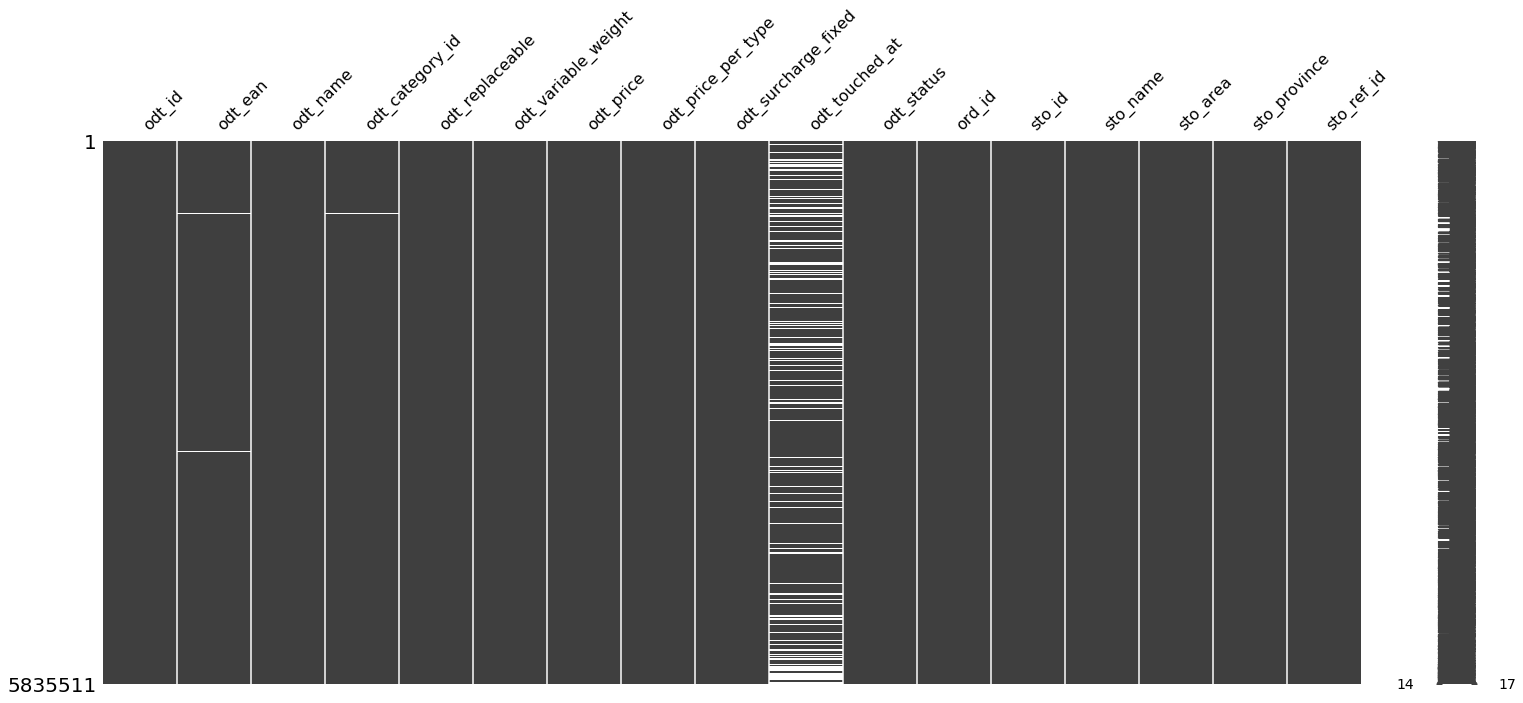

In [12]:
import missingno as msno
%matplotlib inline
msno.matrix(df_merge)

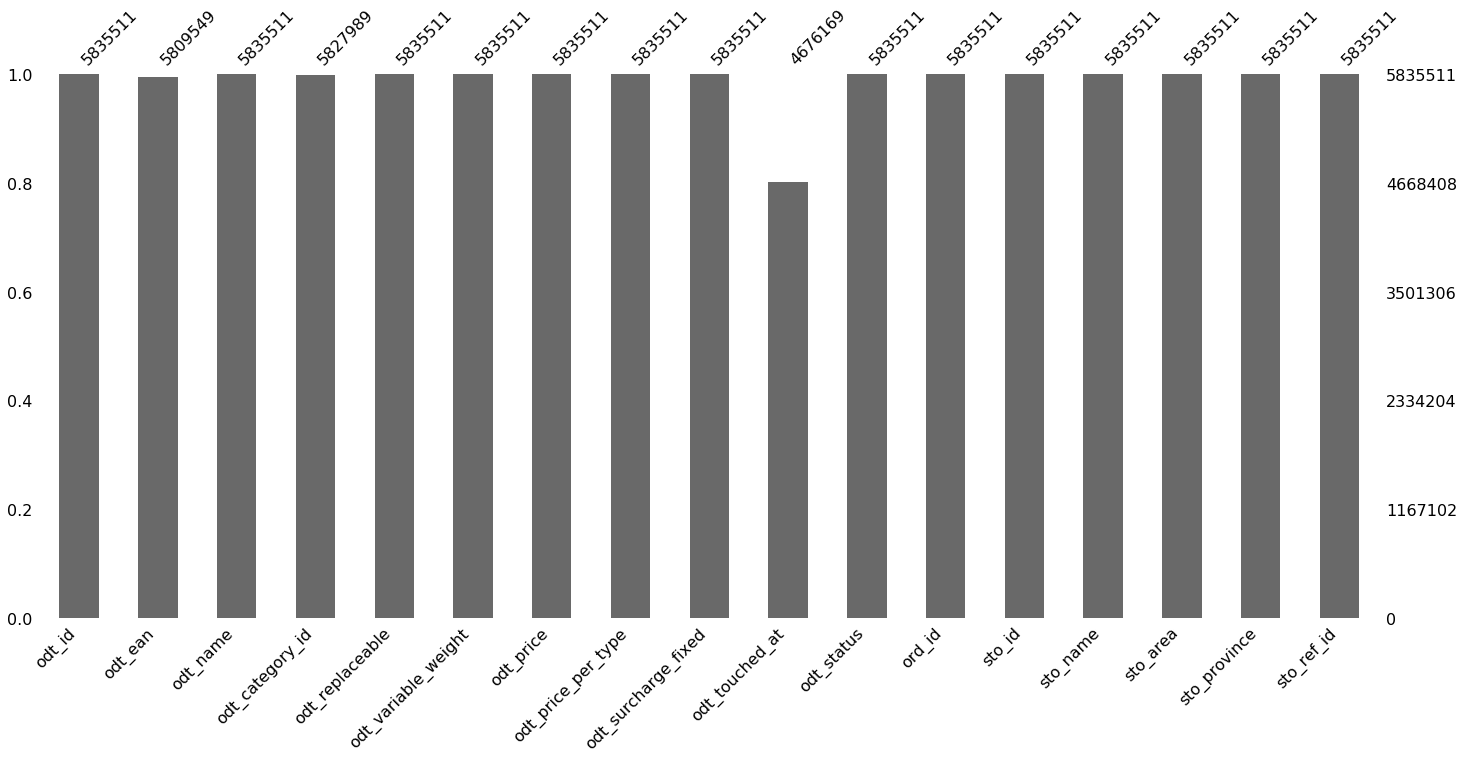

In [13]:
msno.bar(df_merge)